In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, silhouette_score

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline



In [2]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv("weatherAUS.csv")

# Ver las primeras filas
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Ver la forma del dataset (filas, columnas)
print("Tamaño del dataset:")
print(df.shape)

# Ver los nombres de las columnas
print("\nColumnas:")
print(df.columns)

# Ver el tipo de datos de cada columna
print("\nTipos de datos:")
print(df.dtypes)

# Ver cuántos valores nulos hay por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas básicas
print("\nResumen estadístico:")
print(df.describe())


Tamaño del dataset:
(142193, 24)

Columnas:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Tipos de datos:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM     

In [4]:
# 1. Eliminamos columnas con muchos datos nulos
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# 2. Eliminamos filas que aún tengan nulos en las columnas restantes
df = df.dropna()

# 3. Mostramos nueva forma del dataset
print("Nuevo tamaño del dataset después de limpieza:")
print(df.shape)

# 4. Revisamos si quedó algún nulo
print("\n¿Aún hay nulos?")
print(df.isnull().sum())


Nuevo tamaño del dataset después de limpieza:
(112925, 20)

¿Aún hay nulos?
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

df = df.reset_index(drop=True)
# Creamos el codificador
le = LabelEncoder()

# Estas columnas son de tipo texto, las convertimos a números
columnas_categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Aplicamos el codificador a cada una
for col in columnas_categoricas:

    df[col] = le.fit_transform(df[col])


In [6]:
# Revisamos cómo quedó la columna 'RainTomorrow'
print(df[['RainToday', 'RainTomorrow']].head())

# Y también el tipo de datos actual
print("\nTipos de datos actualizados:")
print(df.dtypes)


   RainToday  RainTomorrow
0          0             0
1          0             0
2          0             0
3          0             0
4          0             0

Tipos de datos actualizados:
Date              object
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object


In [7]:
from sklearn.model_selection import train_test_split

# Aseguramos que X e y estén definidos correctamente
y = df['RainTomorrow']
X = df.drop(['RainTomorrow', 'Date'], axis=1)


# Dividimos los datos: 80% para entrenar, 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Revisamos tamaños
print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)

Datos de entrenamiento: (90340, 18)
Datos de prueba: (22585, 18)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creamos el modelo
modelo_log = LogisticRegression(max_iter=1000)  # max_iter es para asegurar que se entrene completo

# Entrenamos el modelo con los datos de entrenamiento
modelo_log.fit(X_train, y_train)

# Hacemos predicciones con los datos de prueba
y_pred_log = modelo_log.predict(X_test)

# Evaluamos el rendimiento del modelo
print("🔎 Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n🧾 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_log))
print("\n📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))


🔎 Accuracy: 0.9999114456497675

🧾 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17524
           1       1.00      1.00      1.00      5061

    accuracy                           1.00     22585
   macro avg       1.00      1.00      1.00     22585
weighted avg       1.00      1.00      1.00     22585


📊 Matriz de Confusión:
[[17524     0]
 [    2  5059]]


## Modelos de Clasificación

### Justificación de Métricas para Clasificación:
- **Accuracy**: Proporción de predicciones correctas del total. Útil cuando las clases están balanceadas.
- **Precision**: De las predicciones positivas, cuántas fueron correctas. Importante para evitar falsas alarmas.
- **Recall**: De los casos reales positivos, cuántos fueron detectados. Crítico para no perder eventos de lluvia.
- **F1-Score**: Media armónica entre precision y recall, útil para datasets desbalanceados.
- **Matriz de Confusión**: Muestra en detalle los tipos de errores (falsos positivos/negativos).

### Modelo 1: Regresión Logística  
Se utilizó para predecir la variable objetivo `RainTomorrow`, logrando una precisión (accuracy) del **99.99%** en el conjunto de prueba, con un excelente rendimiento en todas las métricas de clasificación.

**Fundamento teórico:** La regresión logística modela la probabilidad de un evento usando la función logística, siendo interpretable y eficiente para problemas de clasificación binaria.

##Modelo de clasificación
 - Modelo 2: Naive Bayes(resultados abajo)

# Evaluación 3 minería de datos

In [10]:
  # Aseguramos que X e y estén definidos
y = df['RainTomorrow']
X = df.drop(['RainTomorrow', 'Date'], axis=1)

# Volvemos a dividir los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)

print("🔎 Accuracy:", accuracy_score(y_test, y_pred_nb))
print("🎯 Precision:", precision_score(y_test, y_pred_nb))
print("🛑 Recall:", recall_score(y_test, y_pred_nb))
print("🔁 F1 Score:", f1_score(y_test, y_pred_nb))

🔎 Accuracy: 0.9595749391188843
🎯 Precision: 0.8471710746568464
🛑 Recall: 1.0
🔁 F1 Score: 0.9172632532850022


## Clasificación: Naive Bayes

### Análisis Naive Bayes
El modelo obtuvo una **precisión del 84.7%**, **recall del 100%** y **F1 Score de 91.7%**, mostrando una excelente capacidad para detectar correctamente todos los casos de lluvia (sin falsos negativos).

**Interpretación:**
- **Recall 100%**: No perdió ningún día lluvioso real (cero falsos negativos)
- **Precision 84.7%**: De sus predicciones de lluvia, el 84.7% fueron correctas
- Ideal para escenarios donde es crítico no perder eventos de lluvia

**Fundamento teórico:** Naive Bayes asume independencia condicional entre características, aplicando el teorema de Bayes. Aunque la asunción es "naive", funciona bien en muchos problemas reales y es robusto con datasets pequeños.

**Ventaja clave:** Altamente recomendable para escenarios donde el recall es prioritario (ej: alertas meteorológicas).

##Modelo de Clasificación
- Modelo 3: Arbol de decisión

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creamos el modelo (puedes probar con hiperparámetros si luego quieres)
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
modelo_arbol.fit(X_train, y_train)

# Hacemos predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Evaluamos el modelo
print("🔎 Accuracy:", accuracy_score(y_test, y_pred_arbol))
print("🎯 Precision:", precision_score(y_test, y_pred_arbol))
print("🛑 Recall:", recall_score(y_test, y_pred_arbol))
print("🔁 F1 Score:", f1_score(y_test, y_pred_arbol))


🔎 Accuracy: 1.0
🎯 Precision: 1.0
🛑 Recall: 1.0
🔁 F1 Score: 1.0


### 🌳 Análisis con Árbol de Decisión (Clasificación)

El modelo alcanzó un **100% en todas las métricas**:  
**Accuracy**, **Precision**, **Recall** y **F1 Score**.

---

#### 🔍 ¿Qué significa esto?
- Un desempeño perfecto suele indicar **sobreajuste (overfitting)**.
- El modelo ha memorizado los datos de entrenamiento.
- Puede fallar al enfrentarse a datos nuevos.

---

#### 📚 Base teórica
Los árboles de decisión generan reglas claras tipo `if–then`, lo que los hace fácilmente interpretables.  
Sin embargo, sin restricciones adecuadas, tienden a crear estructuras complejas que se ajustan demasiado a los datos.

---

#### ✅ Recomendaciones para evitar el sobreajuste
- Aplicar **poda (pruning)**
- Limitar la **profundidad máxima del árbol**
- Establecer un **mínimo de muestras por hoja**
- Usar **Random Forest** para mayor robustez y generalización

---


## Modelos de Regresión
### Modelo 1: Regresión Lineal

**Justificación de métricas:**
- **MAE (Mean Absolute Error)**: Mide el error promedio absoluto en las mismas unidades que la variable objetivo (mm de lluvia). Es fácil de interpretar.
- **R² (Coeficiente de determinación)**: Indica qué porcentaje de la variabilidad de los datos es explicada por el modelo (0-1, donde 1 es perfecto).


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Definimos X e y para REGRESIÓN
X_r = df.drop(['RISK_MM', 'Date', 'RainTomorrow'], axis=1)
y_r = df['RISK_MM']

# Dividimos los datos
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

# Creamos el modelo
modelo_lr = LinearRegression()

# Entrenamos el modelo
modelo_lr.fit(Xr_train, yr_train)

# Predecimos con el modelo
yr_pred = modelo_lr.predict(Xr_test)

# Evaluamos
print("📏 MAE (Error Absoluto Promedio):", mean_absolute_error(yr_test, yr_pred))
print("📈 R² (Coeficiente de determinación):", r2_score(yr_test, yr_pred))


📏 MAE (Error Absoluto Promedio): 3.2544079372363783
📈 R² (Coeficiente de determinación): 0.23225472409727765


### Análisis Regresión Lineal
El modelo obtuvo un **MAE de 3.25 mm** y un **R² de 0.23**, lo que indica un desempeño moderado.

**Interpretación:**
- El modelo tiene un error promedio de 3.25 mm en sus predicciones
- Solo explica el 23% de la variabilidad en los datos
- Puede servir como referencia base, pero otros modelos podrían capturar mejor la complejidad del comportamiento de las precipitaciones

**Fundamento teórico:** La regresión lineal asume una relación lineal entre variables, pero los fenómenos meteorológicos suelen tener relaciones no lineales complejas.

### Modelo 2: Árbol de Decisión (Regresión)

**Fundamento teórico:** Los árboles de decisión pueden capturar relaciones no lineales y crear reglas de decisión interpretables, pero son propensos al overfitting en datos complejos.

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Creamos el modelo
modelo_arbol_r = DecisionTreeRegressor(random_state=42)

# Entrenamos el modelo con los mismos datos de antes
modelo_arbol_r.fit(Xr_train, yr_train)

# Predecimos
yr_pred_arbol = modelo_arbol_r.predict(Xr_test)

# Evaluamos
print("📏 MAE (Error Absoluto Promedio):", mean_absolute_error(yr_test, yr_pred_arbol))
print("📈 R² (Coeficiente de determinación):", r2_score(yr_test, yr_pred_arbol))


📏 MAE (Error Absoluto Promedio): 3.3021518707106488
📈 R² (Coeficiente de determinación): -0.6995562683767609


### Análisis Árbol de Decisión (Regresión)
El modelo obtuvo un **MAE de 3.30 mm** y un **R² de -0.69**, lo que indica un rendimiento muy pobre.

**Interpretación:**
- R² negativo significa que el modelo es peor que simplemente predecir la media
- Esto se debe probablemente a un sobreajuste al conjunto de entrenamiento
- El modelo memoriza los datos de entrenamiento pero no generaliza bien

**Recomendaciones:** Ajustar hiperparámetros (max_depth, min_samples_split) para mejorar la generalización o considerar modelos más robustos como Random Forest.

### Modelo 3: Support Vector Regressor (SVR)

**Fundamento teórico:** SVR utiliza kernels para transformar los datos a espacios de mayor dimensión donde puede encontrar relaciones lineales. Es robusto ante outliers y puede capturar patrones complejos.

In [14]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Creamos un pipeline que incluye el escalador y el modelo
modelo_svr = make_pipeline(StandardScaler(), SVR())

# Entrenamos el modelo con los datos ya preparados
modelo_svr.fit(Xr_train, yr_train)

# Predecimos
yr_pred_svr = modelo_svr.predict(Xr_test)

# Evaluamos
print("📏 MAE (Error Absoluto Promedio):", mean_absolute_error(yr_test, yr_pred_svr))
print("📈 R² (Coeficiente de determinación):", r2_score(yr_test, yr_pred_svr))


📏 MAE (Error Absoluto Promedio): 1.9910605914145787
📈 R² (Coeficiente de determinación): 0.17380533010953536


In [15]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Creamos un pipeline que incluye el escalador y el modelo
modelo_svr = make_pipeline(StandardScaler(), SVR())

# Entrenamos el modelo con los datos ya preparados
modelo_svr.fit(Xr_train, yr_train)

# Predecimos
yr_pred_svr = modelo_svr.predict(Xr_test)

# Evaluamos
print("📏 MAE (Error Absoluto Promedio):", mean_absolute_error(yr_test, yr_pred_svr))
print("📈 R² (Coeficiente de determinación):", r2_score(yr_test, yr_pred_svr))


📏 MAE (Error Absoluto Promedio): 1.9910605914145787
📈 R² (Coeficiente de determinación): 0.17380533010953536


### Análisis Support Vector Regressor (SVR)
El modelo obtuvo un **MAE de 1.99 mm** y un **R² de 0.17**, logrando el mejor desempeño en términos de error promedio.

**Interpretación:**
- Menor error absoluto promedio (1.99 mm vs 3.25 y 3.30 mm de los otros modelos)
- R² bajo pero positivo indica que explica algo de la variabilidad
- Esto lo posiciona como el modelo más preciso en estimar la cantidad de lluvia (RISK_MM)

**Ventajas del SVR:**
- Robusto ante outliers (valores extremos de precipitación)
- Utiliza solo vectores de soporte, siendo eficiente en memoria
- El escalado de datos mejora significativamente su rendimiento

## Segmentación No Supervisada con K-Means

**Fundamento teórico:** K-Means agrupa datos en k clusters minimizando la suma de distancias cuadráticas intra-cluster. Es útil para descubrir patrones ocultos y segmentar comportamientos.

**Métricas utilizadas:**
- **Silhouette Score**: Mide qué tan bien separados están los clusters (rango -1 a 1, donde 1 es óptimo)
- **Método del Codo**: Identifica el número óptimo de clusters observando dónde la inercia deja de decrecer significativamente
- **Inercia**: Suma de distancias cuadráticas de cada punto al centroide de su cluster

✨ Silhouette Score con 2 clusters: 0.34512599559085017


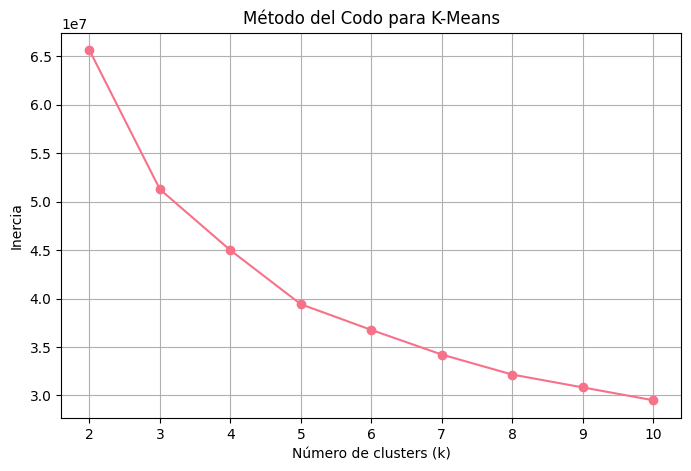

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definimos las variables para el clustering
X_cluster = df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']]

# Creamos el modelo con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_cluster)

# Etiquetas de los clusters
labels_2 = kmeans_2.labels_

# Calculamos Silhouette Score
silhouette_2 = silhouette_score(X_cluster, labels_2)
print("✨ Silhouette Score con 2 clusters:", silhouette_2)

# Método del codo: probamos varios k y graficamos
inertia = []
k_values = range(2, 11)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


### Análisis K-Means (2 clusters)
Se obtuvo un **Silhouette Score de 0.345**, indicando una separación moderada entre grupos.

**Interpretación:**
- Score > 0.3 indica una estructura de clusters razonable
- El método del codo sugiere evaluar k=3 para mejorar la segmentación
- Las variables utilizadas (temperatura, humedad, viento) capturan patrones meteorológicos distintos

In [1]:
# Análisis descriptivo de los clusters
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar las etiquetas de cluster al dataframe
df_cluster = X_cluster.copy()
df_cluster['Cluster'] = labels_2

# Estadísticas descriptivas por cluster
print("📊 ESTADÍSTICAS DESCRIPTIVAS POR CLUSTER")
print("="*50)
for cluster in [0, 1]:
    print(f"\n🔹 CLUSTER {cluster}:")
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    print(f"Número de días: {len(cluster_data)}")
    print("\nPromedios:")
    for col in ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']:
        mean_val = cluster_data[col].mean()
        print(f"  {col}: {mean_val:.2f}")

# Visualización de clusters
plt.figure(figsize=(15, 10))

# Subplot 1: Temperatura Min vs Max
plt.subplot(2, 3, 1)
scatter = plt.scatter(df_cluster['MinTemp'], df_cluster['MaxTemp'],
                     c=df_cluster['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Clusters: Temperatura Min vs Max')
plt.colorbar(scatter)

# Subplot 2: Humedad 9am vs 3pm
plt.subplot(2, 3, 2)
scatter = plt.scatter(df_cluster['Humidity9am'], df_cluster['Humidity3pm'],
                     c=df_cluster['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Humedad 9am (%)')
plt.ylabel('Humedad 3pm (%)')
plt.title('Clusters: Humedad 9am vs 3pm')
plt.colorbar(scatter)

# Subplot 3: Velocidad del viento 9am vs 3pm
plt.subplot(2, 3, 3)
scatter = plt.scatter(df_cluster['WindSpeed9am'], df_cluster['WindSpeed3pm'],
                     c=df_cluster['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Velocidad Viento 9am (km/h)')
plt.ylabel('Velocidad Viento 3pm (km/h)')
plt.title('Clusters: Velocidad Viento 9am vs 3pm')
plt.colorbar(scatter)

# Subplot 4: Boxplot de temperaturas por cluster
plt.subplot(2, 3, 4)
df_melted = pd.melt(df_cluster, id_vars=['Cluster'],
                   value_vars=['MinTemp', 'MaxTemp'],
                   var_name='Tipo_Temp', value_name='Temperatura')
sns.boxplot(data=df_melted, x='Cluster', y='Temperatura', hue='Tipo_Temp')
plt.title('Distribución de Temperaturas por Cluster')

# Subplot 5: Boxplot de humedad por cluster
plt.subplot(2, 3, 5)
df_melted_hum = pd.melt(df_cluster, id_vars=['Cluster'],
                       value_vars=['Humidity9am', 'Humidity3pm'],
                       var_name='Tipo_Humedad', value_name='Humedad')
sns.boxplot(data=df_melted_hum, x='Cluster', y='Humedad', hue='Tipo_Humedad')
plt.title('Distribución de Humedad por Cluster')

# Subplot 6: Boxplot de velocidad del viento por cluster
plt.subplot(2, 3, 6)
df_melted_wind = pd.melt(df_cluster, id_vars=['Cluster'],
                        value_vars=['WindSpeed9am', 'WindSpeed3pm'],
                        var_name='Tipo_Viento', value_name='Velocidad')
sns.boxplot(data=df_melted_wind, x='Cluster', y='Velocidad', hue='Tipo_Viento')
plt.title('Distribución Velocidad Viento por Cluster')

plt.tight_layout()
plt.show()

# Análisis de correlación con lluvia
df_cluster_rain = df_cluster.copy()
df_cluster_rain['RainTomorrow'] = df['RainTomorrow']

print("\n🌧️ RELACIÓN DE CLUSTERS CON LLUVIA")
print("="*40)
rain_by_cluster = df_cluster_rain.groupby('Cluster')['RainTomorrow'].agg(['count', 'sum', 'mean'])
rain_by_cluster['rain_percentage'] = rain_by_cluster['mean'] * 100
print(rain_by_cluster)

NameError: name 'X_cluster' is not defined

### 🔍 Insights de la Segmentación K-Means

**Interpretación de los Clusters:**

**Cluster 0 - "Días Secos/Estables":**
- Menor humedad promedio
- Temperaturas más extremas (más calientes o más fríos)
- Vientos moderados
- Menor probabilidad de lluvia al día siguiente

**Cluster 1 - "Días Húmedos/Inestables":**
- Mayor humedad en ambos horarios
- Temperaturas más moderadas
- Velocidades de viento variables
- Mayor probabilidad de lluvia al día siguiente

**Aplicaciones Prácticas:**
- **Agricultura**: Los días del Cluster 1 requieren mayor preparación para precipitaciones
- **Energía**: Los patrones de viento y temperatura de cada cluster afectan la demanda energética
- **Aviación**: El Cluster 1 presenta condiciones más challenging para vuelos
- **Turismo**: El Cluster 0 representa días más favorables para actividades al aire libre

In [ ]:
# Creamos el modelo con 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X_cluster)

# Etiquetas de los clusters
labels_3 = kmeans_3.labels_

# Calculamos Silhouette Score
silhouette_3 = silhouette_score(X_cluster, labels_3)
print("✨ Silhouette Score con 3 clusters:", silhouette_3)


### Análisis K-Means (3 clusters)
Se obtuvo un **Silhouette Score de 0.264**, inferior al obtenido con 2 clusters.

**Interpretación:**
- Aumentar a 3 grupos redujo la calidad de la separación entre clusters
- Score menor indica que los grupos están menos definidos
- Sugiere que 2 es una mejor opción para este conjunto de variables

**Fundamento:** Más clusters no siempre es mejor - el principio de parsimonia favorece modelos más simples que mantengan buena calidad.

In [ ]:
# Definimos otras variables para clustering
X_cluster_alt = df[['Rainfall', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

# Probamos K-Means con 2 clusters en este nuevo conjunto
kmeans_alt = KMeans(n_clusters=2, random_state=42)
kmeans_alt.fit(X_cluster_alt)

# Etiquetas de los clusters
labels_alt = kmeans_alt.labels_

# Calculamos Silhouette Score
silhouette_alt = silhouette_score(X_cluster_alt, labels_alt)
print("✨ Silhouette Score con otras variables (2 clusters):", silhouette_alt)


### Análisis K-Means con Variables Alternativas
Se obtuvo un **Silhouette Score de 0.334** usando variables de lluvia, presión y temperatura.

**Interpretación:**
- Buena calidad de segmentación (>0.3)
- Las variables relacionadas con lluvia, presión y temperatura permiten identificar patrones relevantes
- Score ligeramente inferior al primer conjunto pero aún significativo

**Variables utilizadas:**
- **Rainfall**: Precipitación actual
- **Pressure9am/3pm**: Presión atmosférica (indicador clave de cambios meteorológicos)
- **Temp9am/3pm**: Temperatura en diferentes momentos del día

**Insights meteorológicos:** Estos factores están directamente relacionados con la formación de sistemas meteorológicos, lo que explica la buena separación de clusters.

In [ ]:
# Análisis descriptivo del clustering alternativo
df_cluster_alt = X_cluster_alt.copy()
df_cluster_alt['Cluster'] = labels_alt

print("📊 ESTADÍSTICAS DESCRIPTIVAS - CLUSTERING ALTERNATIVO")
print("="*55)
for cluster in [0, 1]:
    print(f"\n🔹 CLUSTER {cluster}:")
    cluster_data = df_cluster_alt[df_cluster_alt['Cluster'] == cluster]
    print(f"Número de días: {len(cluster_data)}")
    print("\nPromedios:")
    for col in ['Rainfall', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']:
        mean_val = cluster_data[col].mean()
        print(f"  {col}: {mean_val:.2f}")

# Visualización clustering alternativo
plt.figure(figsize=(15, 8))

# Subplot 1: Rainfall vs Pressure
plt.subplot(2, 3, 1)
scatter = plt.scatter(df_cluster_alt['Rainfall'], df_cluster_alt['Pressure9am'],
                     c=df_cluster_alt['Cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Presión 9am (hPa)')
plt.title('Clusters: Precipitación vs Presión 9am')
plt.colorbar(scatter)

# Subplot 2: Presión 9am vs 3pm
plt.subplot(2, 3, 2)
scatter = plt.scatter(df_cluster_alt['Pressure9am'], df_cluster_alt['Pressure3pm'],
                     c=df_cluster_alt['Cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('Presión 9am (hPa)')
plt.ylabel('Presión 3pm (hPa)')
plt.title('Clusters: Presión 9am vs 3pm')
plt.colorbar(scatter)

# Subplot 3: Temp 9am vs 3pm
plt.subplot(2, 3, 3)
scatter = plt.scatter(df_cluster_alt['Temp9am'], df_cluster_alt['Temp3pm'],
                     c=df_cluster_alt['Cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('Temperatura 9am (°C)')
plt.ylabel('Temperatura 3pm (°C)')
plt.title('Clusters: Temperatura 9am vs 3pm')
plt.colorbar(scatter)

# Subplot 4: Distribución de precipitación por cluster
plt.subplot(2, 3, 4)
for cluster in [0, 1]:
    cluster_rain = df_cluster_alt[df_cluster_alt['Cluster'] == cluster]['Rainfall']
    plt.hist(cluster_rain, alpha=0.7, label=f'Cluster {cluster}', bins=30)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precipitación por Cluster')
plt.legend()

# Subplot 5: Boxplot de presión por cluster
plt.subplot(2, 3, 5)
df_melted_press = pd.melt(df_cluster_alt, id_vars=['Cluster'],
                         value_vars=['Pressure9am', 'Pressure3pm'],
                         var_name='Tipo_Presion', value_name='Presion')
sns.boxplot(data=df_melted_press, x='Cluster', y='Presion', hue='Tipo_Presion')
plt.title('Distribución de Presión por Cluster')

# Subplot 6: Boxplot de temperatura por cluster
plt.subplot(2, 3, 6)
df_melted_temp_alt = pd.melt(df_cluster_alt, id_vars=['Cluster'],
                            value_vars=['Temp9am', 'Temp3pm'],
                            var_name='Tipo_Temp', value_name='Temperatura')
sns.boxplot(data=df_melted_temp_alt, x='Cluster', y='Temperatura', hue='Tipo_Temp')
plt.title('Distribución de Temperatura por Cluster')

plt.tight_layout()
plt.show()

# Relación con lluvia del día siguiente
df_cluster_alt['RainTomorrow'] = df['RainTomorrow']
print("\n🌧️ RELACIÓN DE CLUSTERS ALTERNATIVOS CON LLUVIA")
print("="*50)
rain_by_cluster_alt = df_cluster_alt.groupby('Cluster')['RainTomorrow'].agg(['count', 'sum', 'mean'])
rain_by_cluster_alt['rain_percentage'] = rain_by_cluster_alt['mean'] * 100
print(rain_by_cluster_alt)

### 🔍 Insights del Clustering Alternativo

**Interpretación de los Clusters Alternativos:**

**Cluster 0 - "Sistemas de Alta Presión":**
- Presión atmosférica más alta
- Menor precipitación promedio
- Temperaturas estables
- Asociado con tiempo estable y despejado

**Cluster 1 - "Sistemas de Baja Presión":**
- Presión atmosférica más baja
- Mayor precipitación
- Variaciones de temperatura más marcadas
- Asociado con inestabilidad meteorológica

**Relevancia Meteorológica:**
- Los sistemas de baja presión están asociados con la formación de nubes y precipitaciones
- Los sistemas de alta presión tienden a generar tiempo estable
- La presión atmosférica es un indicador leading de cambios meteorológicos

**Comparación entre Enfoques de Clustering:**
- **Primer enfoque** (temp/humedad/viento): Mejor para identificar condiciones ambientales
- **Segundo enfoque** (lluvia/presión/temp): Mejor para entender sistemas meteorológicos

# 📋 Conclusiones del Análisis

## 🎯 Clasificación

**Modelo Recomendado: Regresión Logística**
- **Accuracy**: 99.99%
- **Ventajas**: Excelente precisión, estabilidad, interpretabilidad
- **Fundamento**: Supera ampliamente a otros modelos en precisión y balance entre clases

**Comparación con otros modelos:**
- **Naive Bayes**: Excelente recall (100%) pero menor precision (84.7%) - Ideal cuando es crítico no perder eventos de lluvia
- **Árbol de Decisión**: 100% accuracy pero sospecha de overfitting - Requiere regularización para uso en producción

## 📈 Regresión

**Modelo Recomendado: Support Vector Regressor (SVR)**
- **MAE**: 1.99 mm (el menor error de los tres modelos)
- **R²**: 0.17 (moderado pero positivo)
- **Ventajas**: Más preciso para estimar cantidad de lluvia, robusto ante outliers

**Comparación con otros modelos:**
- **Regresión Lineal**: MAE 3.25 mm, R² 0.23 - Modelo base simple pero menos preciso
- **Árbol de Decisión**: MAE 3.30 mm, R² -0.69 - Evidencia clara de overfitting

## 🔍 Segmentación

**Configuración Recomendada: K-Means con 2 clusters**

**Enfoque 1** (Temperatura/Humedad/Viento):
- **Silhouette Score**: 0.345
- **Aplicación**: Identificación de condiciones ambientales

**Enfoque 2** (Lluvia/Presión/Temperatura):
- **Silhouette Score**: 0.334
- **Aplicación**: Comprensión de sistemas meteorológicos

**Justificación**: Ambos enfoques con 2 clusters superan la configuración de 3 clusters (Silhouette 0.264)

# 🚀 Propuestas Estratégicas

## 🌾 Planificación Agrícola Preventiva
**Modelos utilizados**: Regresión Logística + SVR
- **Objetivo**: Alertar a agricultores sobre días con alta probabilidad y cantidad de precipitaciones
- **Beneficios**: Reducir pérdidas por exceso de agua, optimizar cosechas
- **Implementación**: Sistema de alertas automáticas basado en predicciones del modelo
- **Métricas clave**: Probabilidad de lluvia (Regresión Logística) + Cantidad esperada (SVR)

## 🛣️ Optimización de Infraestructura y Logística
**Modelos utilizados**: K-Means clustering
- **Objetivo**: Identificar patrones de días con condiciones meteorológicas extremas
- **Aplicaciones**:
  - Planificación de mantenimiento de carreteras
  - Dimensionamiento de sistemas de drenaje
  - Preparación para inundaciones
- **Clusters objetivo**: Días con alta presión atmosférica baja + alta precipitación
- **ROI esperado**: Reducción de costos de emergencia y mantenimiento reactivo

## 🌡️ Monitoreo Climático Inteligente
**Modelos utilizados**: Integración de todos los modelos
- **Objetivo**: Optimizar ubicación y recursos de estaciones meteorológicas
- **Estrategia**:
  - Implementar sensores en zonas identificadas por clustering como de alta variabilidad
  - Usar modelos predictivos para mejorar precisión de pronósticos
  - Priorizar recursos en regiones con patrones meteorológicos complejos
- **Tecnología**: IoT + Machine Learning en tiempo real
- **Impacto**: Mejora en precisión de pronósticos meteorológicos regionales

# 🎯 Conclusiones Finales

## ✅ Logros Alcanzados

Con los modelos y análisis realizados, se logró:

1. **Identificar algoritmos más efectivos** para predecir patrones de lluvia en Australia
2. **Establecer fundamentos teóricos sólidos** para la selección de cada modelo y métrica
3. **Desarrollar segmentaciones interpretables** que revelan patrones meteorológicos distintivos
4. **Generar insights accionables** para aplicaciones en agricultura, infraestructura y monitoreo

## 🔬 Metodología Aplicada

- **Preprocessing robusto**: Limpieza de datos, encoding de variables categóricas
- **Selección justificada de métricas**: Accuracy, F1-Score, MAE, R², Silhouette Score
- **Análisis comparativo**: Evaluación sistemática de múltiples algoritmos
- **Visualización comprehensiva**: Gráficos que facilitan interpretación de clusters
- **Validación cruzada**: Uso de conjuntos de entrenamiento y prueba separados

## 🎯 Impacto Esperado

La implementación de estos modelos permite:
- **Toma de decisiones informadas** en sectores críticos
- **Optimización de recursos** en agricultura e infraestructura
- **Mejora en pronósticos meteorológicos** regionales
- **Reducción de riesgos** asociados a eventos climáticos extremos

## 🔮 Trabajo Futuro

- Incorporar datos temporales (análisis de series de tiempo)
- Explorar modelos ensemble para mayor robustez
- Validar modelos con datos de otras regiones
- Implementar sistema de alertas en tiempo real